Y=0.60 Y'=1.48
Y=1.00 Y'=1.00
Y=1.40 Y'=0.65


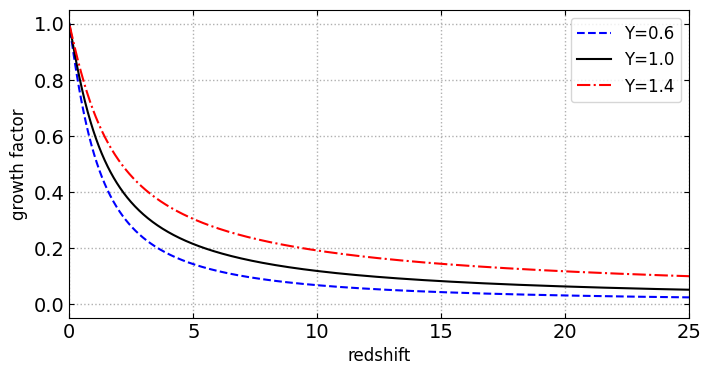

In [33]:
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from renormalisation import renorm
import numpy as np
import operator
import time

# ================== settings ============================ #

# modified gravity values to be plotted (normalisation at z_recomb)
Y = [0.6, 1, 1.4]

# redshift of recombination
z_recomb = 1100

# ================== constants =========================== #

Ho = 0.6766 * 3.2407e-18
OMm = 0.31
OMl = 1 - OMm
OMr = 8.6e-5
e = np.e
G_eff = 1

# =================== 21cmFast methods ==================== #

def omega_z(z):
    return OMm * (1+z)**3 / (1 - OMm + (1+z)**3 * OMm + OMr * (1+z)**4)

def dicke(omega):
    return 5/2 * omega * (1/70 + 209 * omega / 140 - omega**2 / 140 + omega**(4/7))**(-1)

# ================== ode solver methods (s) =================== #

# Note: s = ln(a)

def hubble(s):
    a = e**s
    return Ho * (OMm / pow(a, 3) + OMr / pow(a, 4) + OMl)**(1/2);

def dhubbledz(s):
    a = e**s
    return - a/2 * Ho * Ho / hubble(s) * (3 * OMm / pow(a, 4) + 4 * OMr / pow(a, 5))

def alpha(s):
    return 2 + dhubbledz(s) / hubble(s)

def beta(s):
    a = e**s
    return 3/2 * OMm / pow(a, 3) * Ho**2 / (hubble(s))**2 * G_eff

def ode(u,x):
    return (u[1], beta(x) * u[0] - alpha(x) * u[1])

# ================ ode solver ================ #

def solver():
    y0 = [0.01,0.01]
    
    s_min = np.log(1/(z_recomb+1))
    s_today = 0
    
    s = np.linspace(s_min, s_today, z_recomb)
    sol = odeint(ode, y0, s)
    
    growth = sol[:,0]

    z = [1/(e**s[i]) - 1 for i in range(0, z_recomb)]
    
    growth = [x / growth[z_recomb-1] for x in growth]
    
    return z, growth
    
# ====================== figure ==================== #

styles = ['--', '-', '-.', ':']
colors = ['blue', 'black', 'red', 'green']
    
plt.rcParams.update({'mathtext.default': 'regular'})
fig = plt.figure(1, figsize=(8,4))
ax = plt.subplot()
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)

for i, val in enumerate(Y):
    G_eff = renorm(val)
    res = solver()

    if i <= 3:
        ax.plot(res[0], res[1], styles[i], color=colors[i], label='Y=' + f'{val:.1f}')
    else:
        ax.plot(res[0], res[1], label='Y=' + str(val))

    print(f"Y={val:.2f}",f"Y'={G_eff:.2f}")

ax.set_xlim([0,25])

plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('redshift', fontsize=12)
plt.ylabel('growth factor', fontsize=12)
plt.grid(linestyle=':', linewidth=1)

fig.savefig("growth_function.png")